In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To import necessary libraries
import numpy as np
import pandas as pd

# To Visualize
import matplotlib.pyplot as plt
import seaborn as sns

# To Scale the Data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

## Step 1 : Reading and Understanding the Data

In [3]:
#read the input file
leads = pd.read_csv("Leads.csv", encoding = "ISO-8859-1")

In [4]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit          ...           \
0                            0                   0.0          ...            
1                          674                   2.5          ...            
2                         1532                   2.0          ...            
3                          305                   1.0          ...            
4                         1428                   1.0          ...            

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [5]:
leads.shape

(9240, 37)

In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [9]:
# To calculate Imbalance Percentage of Target
target_count = leads['Converted'].value_counts()
print ('Target 0 =', target_count[0])
print ('Target 1 =', target_count[1])
print ('Imbalance Percent =', round(target_count[0]/target_count[1],2),'%')

Target 0 = 5679
Target 1 = 3561
Imbalance Percent = 1.59 %


## Step 2 : Data Visualization

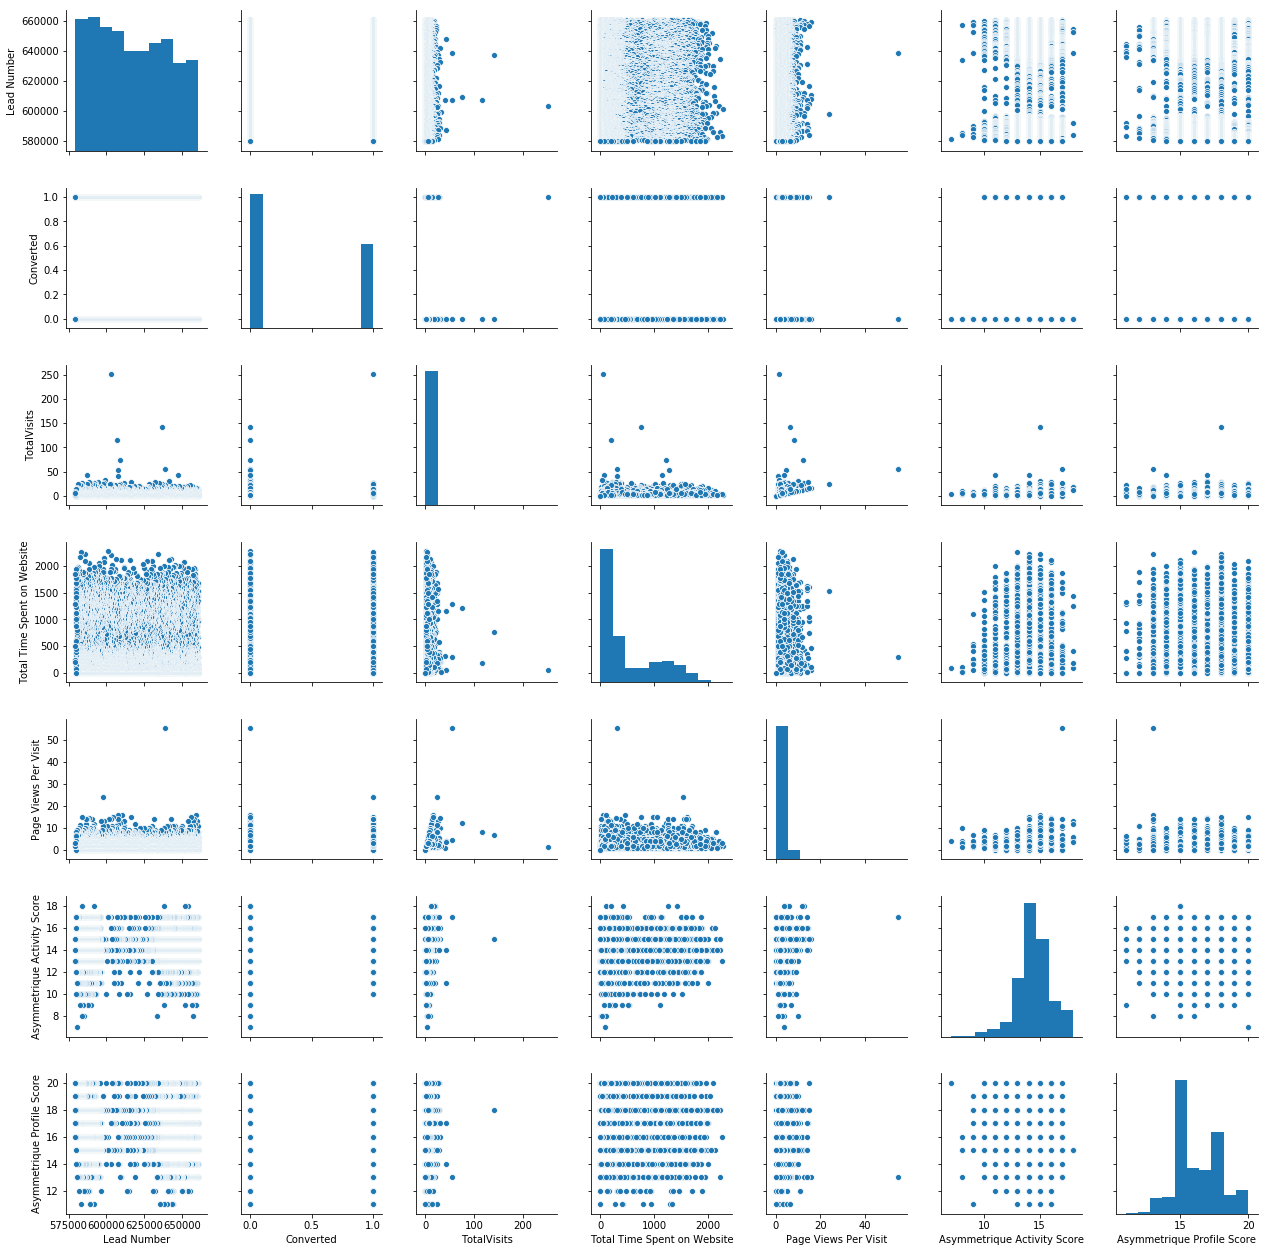

In [10]:
# Visualizing Numeric Variables
sns.pairplot(leads)
plt.show()

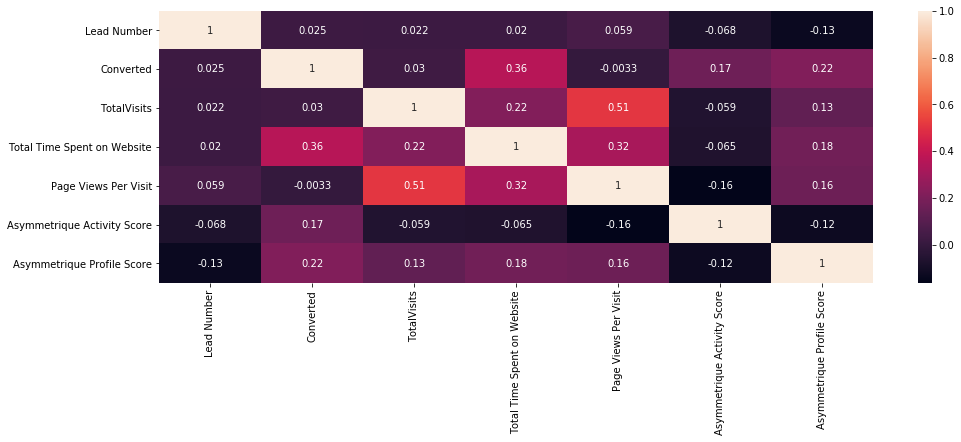

In [11]:
plt.figure(figsize = (16,5))
sns.heatmap(leads.corr(),annot=True)
plt.show()

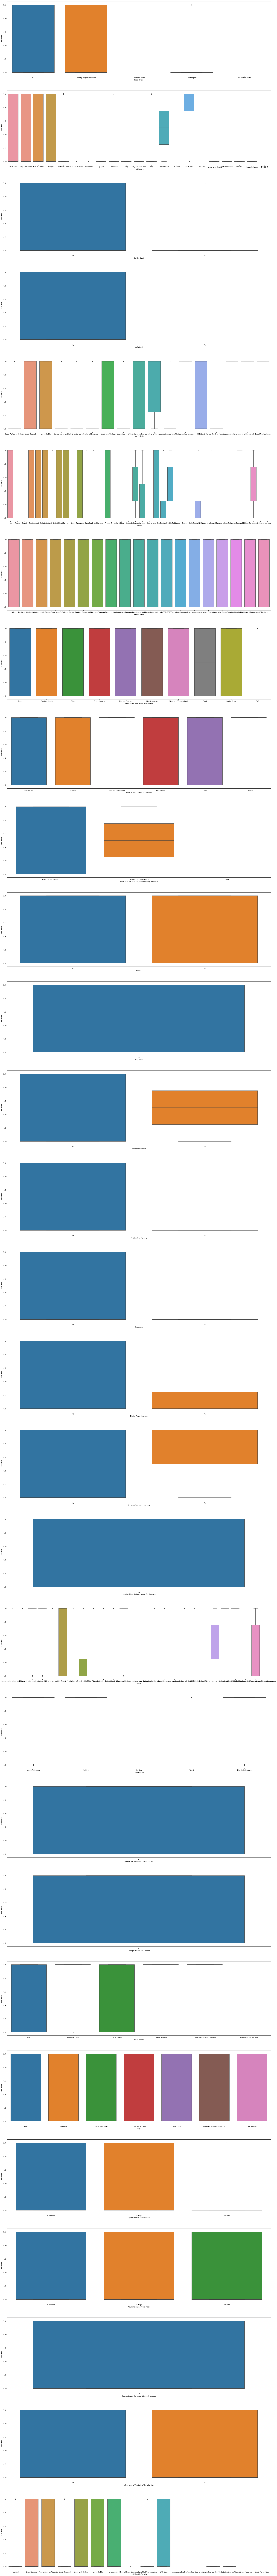

In [12]:
## Visualizing Categorical Variables
plt.figure(figsize=(30,300))
plt.subplot(29,1,1)
sns.boxplot(x = 'Lead Origin', y = 'Converted', data = leads)
plt.subplot(29,1,2)
sns.boxplot(x = 'Lead Source', y = 'Converted', data = leads)
plt.subplot(29,1,3)
sns.boxplot(x = 'Do Not Email', y = 'Converted', data = leads)
plt.subplot(29,1,4)
sns.boxplot(x = 'Do Not Call', y = 'Converted', data = leads)
plt.subplot(29,1,5)
sns.boxplot(x = 'Last Activity', y = 'Converted', data = leads)
plt.subplot(29,1,6)
sns.boxplot(x = 'Country', y = 'Converted', data = leads)
plt.subplot(29,1,7)
sns.boxplot(x = 'Specialization', y = 'Converted', data = leads)
plt.subplot(29,1,8)
sns.boxplot(x = 'How did you hear about X Education', y = 'Converted', data = leads)
plt.subplot(29,1,9)
sns.boxplot(x = 'What is your current occupation', y = 'Converted', data = leads)
plt.subplot(29,1,10)
sns.boxplot(x = 'What matters most to you in choosing a course', y = 'Converted', data = leads)
plt.subplot(29,1,11)
sns.boxplot(x = 'Search', y = 'Converted', data = leads)
plt.subplot(29,1,12)
sns.boxplot(x = 'Magazine', y = 'Converted', data = leads)
plt.subplot(29,1,13)
sns.boxplot(x = 'Newspaper Article', y = 'Converted', data = leads)
plt.subplot(29,1,14)
sns.boxplot(x = 'X Education Forums', y = 'Converted', data = leads)
plt.subplot(29,1,15)
sns.boxplot(x = 'Newspaper', y = 'Converted', data = leads)
plt.subplot(29,1,16)
sns.boxplot(x = 'Digital Advertisement', y = 'Converted', data = leads)
plt.subplot(29,1,17)
sns.boxplot(x = 'Through Recommendations', y = 'Converted', data = leads)
plt.subplot(29,1,18)
sns.boxplot(x = 'Receive More Updates About Our Courses', y = 'Converted', data = leads)
plt.subplot(29,1,19)
sns.boxplot(x = 'Tags', y = 'Converted', data = leads)
plt.subplot(29,1,20)
sns.boxplot(x = 'Lead Quality', y = 'Converted', data = leads)
plt.subplot(29,1,21)
sns.boxplot(x = 'Update me on Supply Chain Content', y = 'Converted', data = leads)
plt.subplot(29,1,22)
sns.boxplot(x = 'Get updates on DM Content', y = 'Converted', data = leads)
plt.subplot(29,1,23)
sns.boxplot(x = 'Lead Profile', y = 'Converted', data = leads)
plt.subplot(29,1,24)
sns.boxplot(x = 'City', y = 'Converted', data = leads)
plt.subplot(29,1,25)
sns.boxplot(x = 'Asymmetrique Activity Index', y = 'Converted', data = leads)
plt.subplot(29,1,26)
sns.boxplot(x = 'Asymmetrique Profile Index', y = 'Converted', data = leads)
plt.subplot(29,1,27)
sns.boxplot(x = 'I agree to pay the amount through cheque', y = 'Converted', data = leads)
plt.subplot(29,1,28)
sns.boxplot(x = 'A free copy of Mastering The Interview', y = 'Converted', data = leads)
plt.subplot(29,1,29)
sns.boxplot(x = 'Last Notable Activity', y = 'Converted', data = leads)
plt.show()

## Step 3 : Data Preparation

In [13]:
# Before checking for missing values. We need to impute the "select" values as NaN. 
leads = leads.replace('Select',np.nan)

In [14]:
# To check for rows having all missing values
leads.isnull().all(axis=1).sum()

0

In [15]:
# To check columns having all missing values
leads.isnull().all(axis=0).sum()

0

In [16]:
# To check for columns with Single values if any. These columns will be deleted in the below steps. 
constant_columns = []
for column in leads.columns:
    if len(leads[column].unique()) == 1:
        constant_columns.append(column)
display(constant_columns)

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [17]:
# To check for rows having atleast one missing value
leads.isnull().any(axis=1).sum()

8942

In [18]:
# To check for columns having atleast one missing value
leads.isnull().any(axis=0).sum()

17

In [19]:
#To check for Percentage of missing values in each column
missing_percent = leads.isnull().sum() * 100 / len(leads)
missing_val_df = pd.DataFrame({'column_name' : leads.columns,'missing_percent': missing_percent})
missing_val_df.sort_values('missing_percent', ascending = False, inplace=True)
display(missing_val_df.head(17))

column_name  \
How did you hear about X Education                        How did you hear about X Education   
Lead Profile                                                                    Lead Profile   
Lead Quality                                                                    Lead Quality   
Asymmetrique Profile Score                                        Asymmetrique Profile Score   
Asymmetrique Activity Score                                      Asymmetrique Activity Score   
Asymmetrique Activity Index                                      Asymmetrique Activity Index   
Asymmetrique Profile Index                                        Asymmetrique Profile Index   
City                                                                                    City   
Specialization                                                                Specialization   
Tags                                                                                    Tags   
What matters most to you in choosing a course  What matters most to you in choosing a course   
What is your current occupation                              What is your current occupation   
Country                                                                              Country   
Page Views Per Visit                                                    Page Views Per Visit   
TotalVisits                                                                      TotalVisits   
Last Activity                                                                  Last Activity   
Lead Source                                                                      Lead Source   

                                               missing_percent  
How did you hear about X Education                   78.463203  
Lead Profile                                         74.188312  
Lead Quality                                         51.590909  
Asymmetrique Profile Score                           45.649351  
Asymmetrique Activity Score                          45.649351  
Asymmetrique Activity Index                          45.649351  
Asymmetrique Profile Index                           45.649351  
City                                                 39.707792  
Specialization                                       36.580087  
Tags                                                 36.287879  
What matters most to you in choosing a course        29.318182  
What is your current occupation                      29.112554  
Country                                              26.634199  
Page Views Per Visit                                  1.482684  
TotalVisits                                           1.482684  
Last Activity                                         1.114719  
Lead Source                                           0.389610

In [20]:
leads_dp = leads.copy()

In [21]:
#### dropping columns not important for analysis
# 1. dropping columns "How did you hear about X-Education" and "Lead Profile" as their missing values % is high
# 
# 2. "Prospect ID" and "Lead Number" are unique identifiers of the leads and not of importance for analysis
#
# 3. "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "Magazine" and
#     "I agree to pay the amount through cheque" have only single value and hence of no importance. As verified above
#
# 4. "Country" and "City" of the leads are not of importance for analysis as it has no impact in converting a lead.
#
# 5. 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Last Notable Activity' are duplicate of 
#     'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Last Activity' respectively and hence dropeed.
#
leads_dp = leads_dp.drop (['How did you hear about X Education','Lead Profile', 'Prospect ID', 'Lead Number','Receive More Updates About Our Courses', 'I agree to pay the amount through cheque', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Magazine', 'Country','City', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Last Activity'], axis = 1)

#### Data Imputation

In [22]:
# To rename column names. i.e., to replace ' ' by '_' in column names. (for ex: "Value Count" function didnt work on column name with space.)
cols = leads_dp.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str, str)) else x)
leads_dp.columns = cols

In [23]:
leads_dp.Lead_Quality.value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead_Quality, dtype: int64

In [24]:
# it makes more sense to replace the nan values of "Lead Quality" by one of its existing value 'Not Sure'.
leads_dp['Lead_Quality'] = leads_dp['Lead_Quality'].replace(np.nan,'Not Sure')

In [25]:
#
leads_dp.Asymmetrique_Activity_Index.value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique_Activity_Index, dtype: int64

In [26]:
leads_dp['Asymmetrique_Activity_Index'] = leads_dp['Asymmetrique_Activity_Index'].replace(np.nan,leads_dp['Asymmetrique_Activity_Index'].value_counts().index[0])

In [27]:
leads_dp['Asymmetrique_Profile_Index'] = leads_dp['Asymmetrique_Profile_Index'].replace(np.nan,leads_dp['Asymmetrique_Profile_Index'].value_counts().index[0])

In [28]:
# the nan values may be due to non availability of customer's specializtion in the list. Hence, will impute nans to "Others"
leads_dp['Specialization'] = leads_dp['Specialization'].replace(np.nan,'Others')

In [29]:
leads_dp['Tags'] = leads_dp['Tags'].replace(np.nan,leads_dp['Tags'].value_counts().index[0])

In [30]:
leads_dp['What_matters_most_to_you_in_choosing_a_course'] = leads_dp['What_matters_most_to_you_in_choosing_a_course'].replace(np.nan, 'Better Career Prospects')

In [31]:
leads_dp['What_is_your_current_occupation'] = leads_dp['What_is_your_current_occupation'].replace(np.nan, 'Unemployed')

In [32]:
# Since rest of the missing values is <2%, These rows can be droped
leads_dp.dropna(inplace = True)

In [33]:
# To check for datatype of columns
leads_dp.dtypes[leads_dp.dtypes != 'int64'][leads_dp.dtypes != 'float64']

Lead_Origin                                      object
Lead_Source                                      object
Do_Not_Email                                     object
Do_Not_Call                                      object
Specialization                                   object
What_is_your_current_occupation                  object
What_matters_most_to_you_in_choosing_a_course    object
Search                                           object
Newspaper_Article                                object
X_Education_Forums                               object
Newspaper                                        object
Digital_Advertisement                            object
Through_Recommendations                          object
Tags                                             object
Lead_Quality                                     object
Asymmetrique_Activity_Index                      object
Asymmetrique_Profile_Index                       object
A_free_copy_of_Mastering_The_Interview          

In [34]:
# To calculate Imbalance Percentage of Target
target_count = leads_dp['Converted'].value_counts()
print ('Target 0 =', target_count[0])
print ('Target 1 =', target_count[1])
print ('Imbalance Percent =', round(target_count[0]/target_count[1],2),'%')

Target 0 = 5639
Target 1 = 3435
Imbalance Percent = 1.64 %


In [35]:
leads_dp.shape

(9074, 23)

#### Handling Categorical Variables

In [36]:
leads_m = leads_dp

In [37]:
#get a list of categorical columns
cols = leads_m.columns
numerical_cols = leads_m._get_numeric_data().columns
categorical_cols = list(set(cols) - set(numerical_cols))
categorical_cols

['Newspaper_Article',
 'Search',
 'Lead_Origin',
 'Tags',
 'A_free_copy_of_Mastering_The_Interview',
 'Do_Not_Call',
 'Last_Notable_Activity',
 'Specialization',
 'What_matters_most_to_you_in_choosing_a_course',
 'Through_Recommendations',
 'X_Education_Forums',
 'Digital_Advertisement',
 'What_is_your_current_occupation',
 'Newspaper',
 'Lead_Source',
 'Lead_Quality',
 'Do_Not_Email',
 'Asymmetrique_Profile_Index',
 'Asymmetrique_Activity_Index']

In [38]:
# List of variables to map

varlist =  ['Do_Not_Email', 'Do_Not_Call','Search', 'Newspaper_Article', 'X_Education_Forums', 'Newspaper',
       'Digital_Advertisement', 'Through_Recommendations','A_free_copy_of_Mastering_The_Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the function to the leads  list
leads_m[varlist] = leads_m[varlist].apply(binary_map)

### Dummy variables

we will create dummy variables for all other categorical non binary variables

In [39]:
#creating dummy variables for Tags
status = pd.get_dummies(leads_m['Tags'], drop_first = True)
#adding to main dataframe
leads_m = pd.concat([leads_m, status], axis = 1)
#dropping orignial Tags  column
leads_m.drop(['Tags'], axis = 1, inplace = True)

In [40]:
#creating dummy variables for Last Notable Activity
status = pd.get_dummies(leads_m['Last_Notable_Activity'], drop_first = True)
#adding to main dataframe
leads_m = pd.concat([leads_m, status], axis = 1)
#dropping orignial Last Notable Activity  column
leads_m.drop(['Last_Notable_Activity'], axis = 1, inplace = True)

In [41]:
#creating dummy variables for What is your current occupation
status = pd.get_dummies(leads_m['What_is_your_current_occupation'], drop_first = True)
#adding to main dataframe
leads_m = pd.concat([leads_m, status], axis = 1)
#dropping orignial What is your current occupation  column
leads_m.drop(['What_is_your_current_occupation'], axis = 1, inplace = True)

In [42]:
#creating dummy variables for Specialization
status = pd.get_dummies(leads_m['Specialization'], drop_first = True)
#adding to main dataframe
leads_m = pd.concat([leads_m, status], axis = 1)
#dropping orignial Specialization  column
leads_m.drop(['Specialization'], axis = 1, inplace = True)

In [43]:
#creating dummy variables for Asymmetrique Activity Index
status = pd.get_dummies(leads_m['Asymmetrique_Activity_Index'], drop_first = True)
#adding to main dataframe
leads_m = pd.concat([leads_m, status], axis = 1)
#dropping orignial Asymmetrique Activity Index  column
leads_m.drop(['Asymmetrique_Activity_Index'], axis = 1, inplace = True)

In [44]:
#creating dummy variables for Lead Quality
status = pd.get_dummies(leads_m['Lead_Quality'], drop_first = True)
#adding to main dataframe
leads_m = pd.concat([leads_m, status], axis = 1)
#dropping orignial Lead Quality  column
leads_m.drop(['Lead_Quality'], axis = 1, inplace = True)

In [45]:
#creating dummy variables for Lead Origin
status = pd.get_dummies(leads_m['Lead_Origin'], drop_first = True)
#adding to main dataframe
leads_m = pd.concat([leads_m, status], axis = 1)
#dropping orignial Lead Origin  column
leads_m.drop(['Lead_Origin'], axis = 1, inplace = True)

In [46]:
#creating dummy variables for What matters most to you in choosing a course
status = pd.get_dummies(leads_m['What_matters_most_to_you_in_choosing_a_course'], drop_first = True)
#adding to main dataframe
leads_m = pd.concat([leads_m, status], axis = 1)
#dropping orignial What matters most to you in choosing a course  column
leads_m.drop(['What_matters_most_to_you_in_choosing_a_course'], axis = 1, inplace = True)

In [47]:
#creating dummy variables for Lead Source
status = pd.get_dummies(leads_m['Lead_Source'], drop_first = True)
#adding to main dataframe
leads_m = pd.concat([leads_m, status], axis = 1)
#dropping orignial Lead Source  column
leads_m.drop(['Lead_Source'], axis = 1, inplace = True)

In [48]:
#creating dummy variables for Asymmetrique Profile Index
status = pd.get_dummies(leads_m['Asymmetrique_Profile_Index'], drop_first = True)
#adding to main dataframe
leads_m = pd.concat([leads_m, status], axis = 1)
#dropping orignial Asymmetrique Profile Index  column
leads_m.drop(['Asymmetrique_Profile_Index'], axis = 1, inplace = True)

In [49]:
#Final dataframe with all numerical variables now, ready for modeling
leads_m.head()

Do_Not_Email  Do_Not_Call  Converted  TotalVisits  \
0             0            0          0          0.0   
1             0            0          0          5.0   
2             0            0          1          2.0   
3             0            0          0          1.0   
4             0            0          1          2.0   

   Total_Time_Spent_on_Website  Page_Views_Per_Visit  Search  \
0                            0                   0.0       0   
1                          674                   2.5       0   
2                         1532                   2.0       0   
3                          305                   1.0       0   
4                         1428                   1.0       0   

   Newspaper_Article  X_Education_Forums  Newspaper   ...    WeLearn  \
0                  0                   0          0   ...          0   
1                  0                   0          0   ...          0   
2                  0                   0          0   ...          0   
3                  0                   0          0   ...          0   
4                  0                   0          0   ...          0   

   Welingak Website  bing  blog  google  testone  welearnblog_Home  \
0                 0     0     0       0        0                 0   
1                 0     0     0       0        0                 0   
2                 0     0     0       0        0                 0   
3                 0     0     0       0        0                 0   
4                 0     0     0       0        0                 0   

   youtubechannel  02.Medium  03.Low  
0               0          1       0  
1               0          1       0  
2               0          0       0  
3               0          0       0  
4               0          0       0  

[5 rows x 109 columns]

In [50]:
leads_m.shape

(9074, 109)

In [51]:
leads_m.dtypes

Do_Not_Email                                int64
Do_Not_Call                                 int64
Converted                                   int64
TotalVisits                               float64
Total_Time_Spent_on_Website                 int64
Page_Views_Per_Visit                      float64
Search                                      int64
Newspaper_Article                           int64
X_Education_Forums                          int64
Newspaper                                   int64
Digital_Advertisement                       int64
Through_Recommendations                     int64
A_free_copy_of_Mastering_The_Interview      int64
Busy                                        uint8
Closed by Horizzon                          uint8
Diploma holder (Not Eligible)               uint8
Graduation in progress                      uint8
In confusion whether part time or DLP       uint8
Interested  in full time MBA                uint8
Interested in Next batch                    uint8


### Checking for Outliers

In [52]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_leads_m = leads_m[numerical_cols]
num_leads_m.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Converted  TotalVisits  Total_Time_Spent_on_Website  \
count  9074.000000  9074.000000                  9074.000000   
mean      0.378554     3.456028                   482.887481   
std       0.485053     4.858802                   545.256560   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    11.000000   
50%       0.000000     3.000000                   246.000000   
75%       1.000000     5.000000                   922.750000   
90%       1.000000     7.000000                  1373.000000   
95%       1.000000    10.000000                  1557.000000   
99%       1.000000    17.000000                  1839.000000   
max       1.000000   251.000000                  2272.000000   

       Page_Views_Per_Visit  
count           9074.000000  
mean               2.370151  
std                2.160871  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.200000  
90%                5.000000  
95%                6.000000  
99%                9.000000  
max               55.000000

We can see some outliers in TotalVisits, Total Time Spent on Website, and Page Views Per Visit. We will take care of them during feature scaling

#### Verifying for Missing Values

In [53]:
# Adding up the missing values (column-wise)
leads_m.isnull().sum()

Do_Not_Email                              0
Do_Not_Call                               0
Converted                                 0
TotalVisits                               0
Total_Time_Spent_on_Website               0
Page_Views_Per_Visit                      0
Search                                    0
Newspaper_Article                         0
X_Education_Forums                        0
Newspaper                                 0
Digital_Advertisement                     0
Through_Recommendations                   0
A_free_copy_of_Mastering_The_Interview    0
Busy                                      0
Closed by Horizzon                        0
Diploma holder (Not Eligible)             0
Graduation in progress                    0
In confusion whether part time or DLP     0
Interested  in full time MBA              0
Interested in Next batch                  0
Interested in other courses               0
Lateral student                           0
Lost to EINS                    

## Step 3:  Model Building
Let's start by splitting our data into a training set and a test set.

In [54]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = leads_m.drop(['Converted'], axis=1)

# Putting response variable to y
y = leads_m['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [55]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

#### Feature scaling

In [56]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                                                      'Total_Time_Spent_on_Website','Page_Views_Per_Visit']])

X_train.head()

C:\Users\Prathima\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Prathima\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Do_Not_Email  Do_Not_Call  TotalVisits  Total_Time_Spent_on_Website  \
3009             0            0    -0.284595                    -0.160255   
1012             1            0    -0.284595                    -0.540048   
9226             0            0    -0.671384                    -0.888650   
4750             0            0    -0.284595                     1.643304   
7987             0            0     0.295588                     2.017593   

      Page_Views_Per_Visit  Search  Newspaper_Article  X_Education_Forums  \
3009             -0.179666       0                  0                   0   
1012             -0.179666       0                  0                   0   
9226             -1.132538       0                  0                   0   
4750             -0.179666       0                  0                   0   
7987              0.058552       0                  0                   0   

      Newspaper  Digital_Advertisement   ...    WeLearn  Welingak Website  \
3009          0                      0   ...          0                 0   
1012          0                      0   ...          0                 0   
9226          0                      0   ...          0                 0   
4750          0                      0   ...          0                 0   
7987          0                      0   ...          0                 0   

      bing  blog  google  testone  welearnblog_Home  youtubechannel  \
3009     0     0       0        0                 0               0   
1012     0     0       0        0                 0               0   
9226     0     0       0        0                 0               0   
4750     0     0       0        0                 0               0   
7987     0     0       0        0                 0               0   

      02.Medium  03.Low  
3009          1       0  
1012          0       0  
9226          1       0  
4750          1       0  
7987          0       0  

[5 rows x 108 columns]

##### Checking the Churn Rate

In [57]:
churn = (sum(leads_m['Converted'])/len(leads_m['Converted'].index))*100
churn

37.85541106458012

We have almost 38% conversion

### Step 6: Looking at Correlations

In [58]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

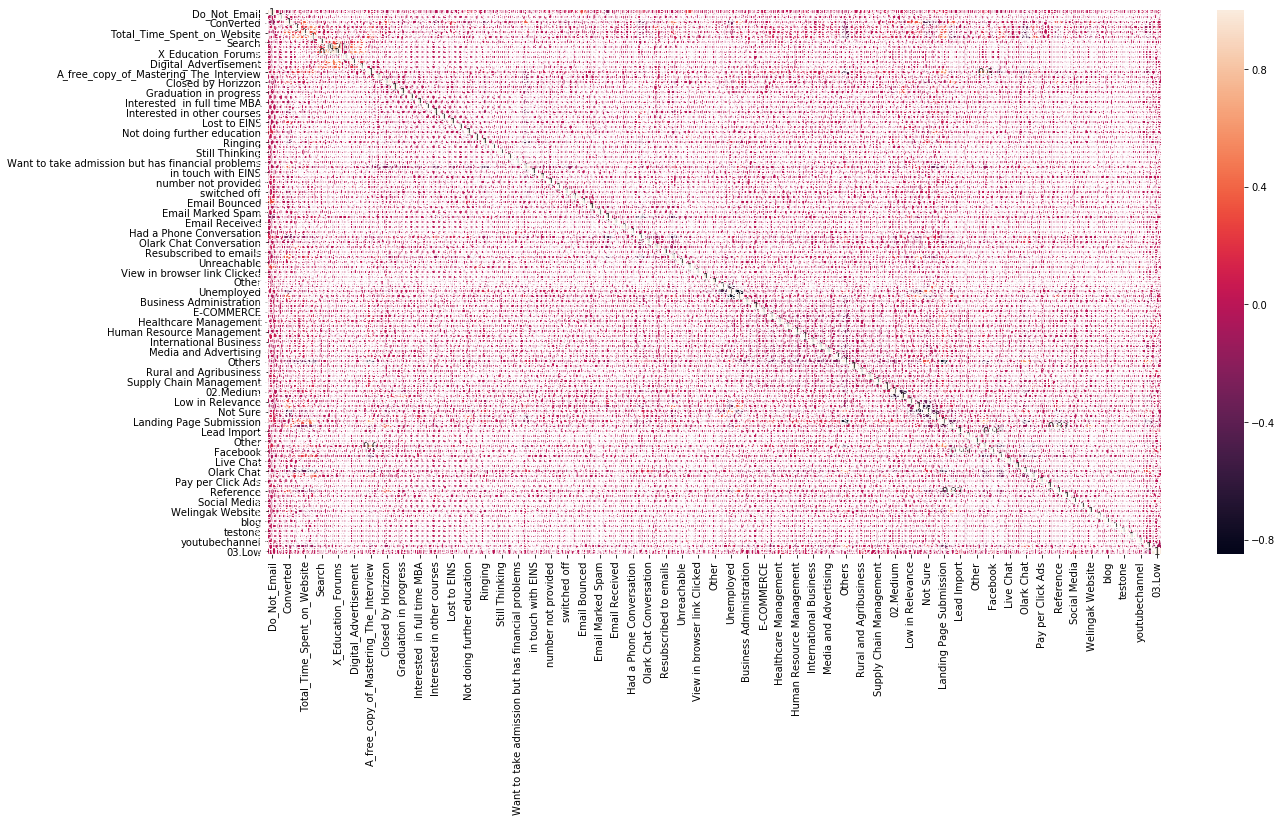

In [59]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads_m.corr(),annot = True)

In [60]:
#Given we cant see anything above, looking at top 15 correlated variables
corr_matrix = leads_m.corr().abs()
#extracting the upper triangle without diagonal (k = 1)
corr_matrix= (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
#first element of sol series is the pair with the bigest correlation
print(round(corr_matrix,4).head(15))

Lead Import                             Facebook                   0.9837
Lead Add Form                           Reference                  0.8662
Unemployed                              Working Professional       0.8479
Others                                  Landing Page Submission    0.7554
Newspaper_Article                       X_Education_Forums         0.7071
Might be                                Not Sure                   0.5977
A_free_copy_of_Mastering_The_Interview  Direct Traffic             0.5956
                                        Landing Page Submission    0.5649
Landing Page Submission                 Olark Chat                 0.5284
02.Medium                               03.Low                     0.5267
Landing Page Submission                 Direct Traffic             0.5237
A_free_copy_of_Mastering_The_Interview  Others                     0.5114
TotalVisits                             Page_Views_Per_Visit       0.5111
Others                                

#### Dropping highly correlated variables

In [61]:
X_test = X_test.drop(['Lead Import','Facebook','Lead Add Form','Reference','Unemployed','Working Professional',
                       'Others','Landing Page Submission','Newspaper_Article','X_Education_Forums'],1)
X_train = X_train.drop(['Lead Import','Facebook','Lead Add Form','Reference','Unemployed','Working Professional',
                       'Others','Landing Page Submission','Newspaper_Article','X_Education_Forums'],1)

#### Checking the Correlation Matrix again
After dropping highly correlated variables now let's check the correlation matrix again.

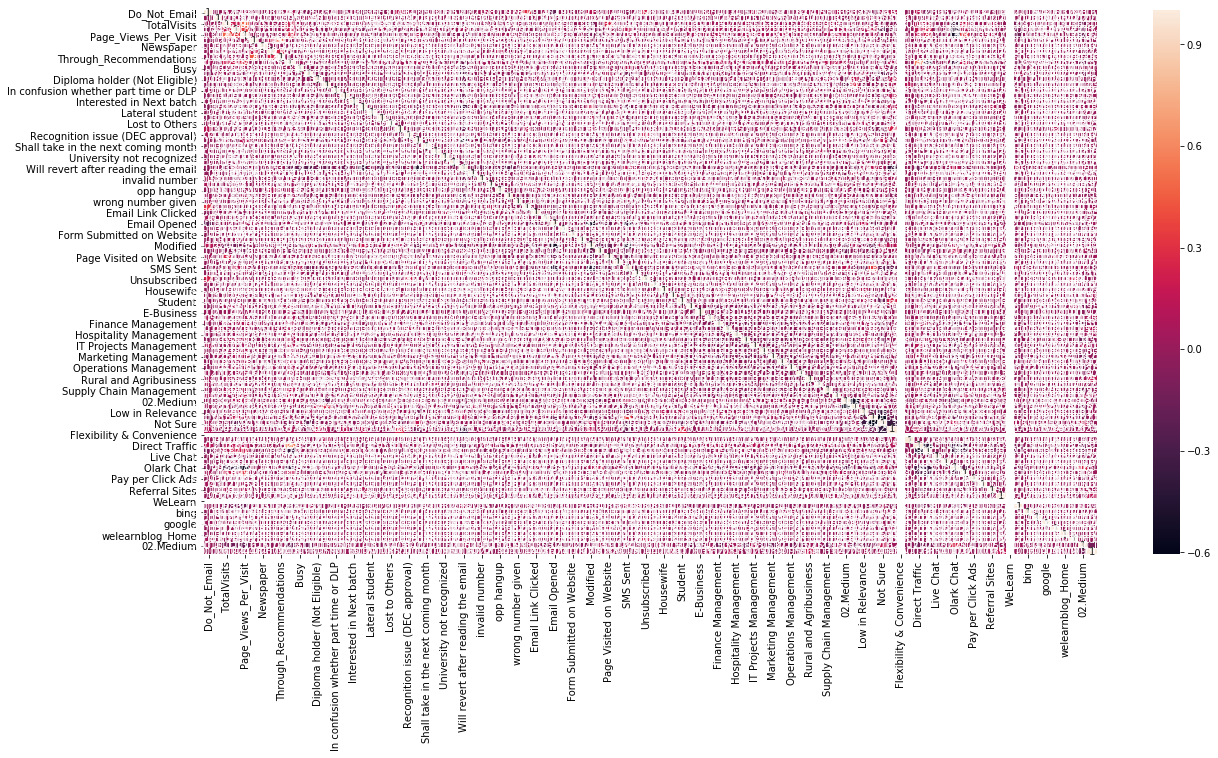

In [62]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Running First Training Model

In [63]:
import statsmodels.api as sm

In [64]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           96
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1267.8
Date:                Mon, 26 Aug 2019   Deviance:                       2535.6
Time:                        23:05:29   Pearson chi2:                 2.40e+04
No. Iterations:                    24   Covariance Type:             nonrobust
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                22.9708   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do_Not_Email                                         -1.4134      0.299     -4.732      0.000      -1.999      -0.828
Do_Not_Call                                          24.1154   1.26e+05      0.000      1.000   -2.47e+05    2.47e+05
TotalVisits                                           0.1637      0.037      4.463      0.000       0.092       0.236
Total_Time_Spent_on_Website                           1.1742      0.064     18.300      0.000       1.048       1.300
Page_Views_Per_Visit                                 -0.1958      0.073     -2.689      0.007      -0.338      -0.053
Search                                               -1.9813      2.335     -0.849      0.396      -6.558       2.595
Newspaper                                           -21.4719   2.16e+05  -9.94e-05      1.000   -4.23e+05    4.23e+05
Digital_Advertisement                                -1.0327      2.538     -0.407      0.684      -6.008       3.943
Through_Recommendations                               1.4322      3.708      0.386      0.699      -5.836       8.700
A_free_copy_of_Mastering_The_Interview               -0.2597      0.174     -1.495      0.135      -0.600       0.081
Busy                                                  4.0538      0.877      4.620      0.000       2.334       5.774
Closed by Horizzon                                    8.8381      1.142      7.738      0.000       6.599      11.077
Diploma holder (Not Eligible)                         0.4616      1.399      0.330      0.742      -2.281       3.204
Graduation in progress                                1.9141      1.086      1.763      0.078      -0.214       4.043
In confusion whether part time or DLP                 3.6865      1.552      2.375      0.018       0.644       6.729
Interested  in full time MBA                          0.5166      1.208      0.428      0.669      -1.852       2.885
Interested in Next batch                             25.0667   9.38e+04      0.000      1.000   -1.84e+05    1.84e+05
Interested in other courses                           0.2088      0.917      0.228      0.820      -1.589       2.006
Lateral student                                      27.6237   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lost to EINS                                         10.0651      1.124      8.954      0.000       7.862      12.268
Lost to Others                                      -21.7786   6.81e+04     -0.000      1.000   -1.34e+05    1.34e+05
Not doing further education                           0.2091      1.366      0.153      0.878      -2.468       2.886
Recognition issue (DEC approval)                    -24.5845   2.16e+05     -0.000      1.000 

### Feature Selection Using RFE

In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [66]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True, False,  True,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False])

In [67]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do_Not_Email', True, 1),
 ('Do_Not_Call', False, 33),
 ('TotalVisits', False, 56),
 ('Total_Time_Spent_on_Website', False, 3),
 ('Page_Views_Per_Visit', False, 53),
 ('Search', False, 38),
 ('Newspaper', False, 75),
 ('Digital_Advertisement', False, 55),
 ('Through_Recommendations', False, 69),
 ('A_free_copy_of_Mastering_The_Interview', False, 44),
 ('Busy', True, 1),
 ('Closed by Horizzon', True, 1),
 ('Diploma holder (Not Eligible)', False, 16),
 ('Graduation in progress', False, 40),
 ('In confusion whether part time or DLP', False, 15),
 ('Interested  in full time MBA', False, 17),
 ('Interested in Next batch', False, 35),
 ('Interested in other courses', False, 11),
 ('Lateral student', False, 12),
 ('Lost to EINS', True, 1),
 ('Lost to Others', False, 25),
 ('Not doing further education', False, 18),
 ('Recognition issue (DEC approval)', False, 37),
 ('Ringing', True, 1),
 ('Shall take in the next coming month', False, 65),
 ('Still Thinking', False, 64),
 ('University not re

In [68]:
col = X_train.columns[rfe.support_]

In [69]:
X_train.columns[~rfe.support_]

Index(['Do_Not_Call', 'TotalVisits', 'Total_Time_Spent_on_Website',
       'Page_Views_Per_Visit', 'Search', 'Newspaper', 'Digital_Advertisement',
       'Through_Recommendations', 'A_free_copy_of_Mastering_The_Interview',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'In confusion whether part time or DLP', 'Interested  in full time MBA',
       'Interested in Next batch', 'Interested in other courses',
       'Lateral student', 'Lost to Others', 'Not doing further education',
       'Recognition issue (DEC approval)',
       'Shall take in the next coming month', 'Still Thinking',
       'University not recognized',
       'Want to take admission but has financial problems',
       'in touch with EINS', 'opp hangup', 'Email Bounced',
       'Email Link Clicked', 'Email Marked Spam', 'Email Opened',
       'Email Received', 'Form Submitted on Website',
       'Had a Phone Conversation', 'Modified', 'Olark Chat Conversation',
       'Page Visited on Website',

##### Assessing the model with StatsModels

In [70]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1577.7
Date:                Mon, 26 Aug 2019   Deviance:                       3155.3
Time:                        23:05:38   Pearson chi2:                 3.54e+04
No. Iterations:                    24   Covariance Type:             nonrobust
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.3957      0.206     -6.763      0.000      -1.800      -0.991
Do_Not_Email                           -1.2745      0.214     -5.949      0.000      -1.694      -0.855
Busy                                    3.3554      0.332     10.121      0.000       2.706       4.005
Closed by Horizzon                      7.9199      0.765     10.354      0.000       6.421       9.419
Lost to EINS                            9.0617      0.765     11.850      0.000       7.563      10.560
Ringing                                -2.3022      0.340     -6.772      0.000      -2.968      -1.636
Will revert after reading the email     3.5905      0.225     15.967      0.000       3.150       4.031
invalid number                        -23.9097   2.19e+04     -0.001      0.999    -4.3e+04    4.29e+04
number not provided                   -24.3829   3.77e+04     -0.001      0.999   -7.39e+04    7.39e+04
switched off                           -3.0312      0.590     -5.141      0.000      -4.187      -1.876
wrong number given                    -23.4870   3.11e+04     -0.001      0.999   -6.09e+04    6.09e+04
SMS Sent                                2.8287      0.123     22.909      0.000       2.587       3.071
03.Low                                 -1.7460      0.359     -4.867      0.000      -2.449      -1.043
03.Low                                  0.9735      0.618      1.576      0.115      -0.237       2.184
Not Sure                               -3.6260      0.125    -28.913      0.000      -3.872      -3.380
Worst                                  -4.0501      0.805     -5.031      0.000      -5.628      -2.472
Welingak Website                        4.5447      0.739      6.151      0.000       3.097       5.993
=======================================================================================================
"""

In [71]:
col1 = col.drop('invalid number',1)

In [72]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1585.4
Date:                Mon, 26 Aug 2019   Deviance:                       3170.8
Time:                        23:05:39   Pearson chi2:                 3.46e+04
No. Iterations:                    23   Covariance Type:             nonrobust
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.5747      0.210     -7.499      0.000      -1.986      -1.163
Do_Not_Email                           -1.2640      0.213     -5.926      0.000      -1.682      -0.846
Busy                                    3.5609      0.331     10.766      0.000       2.913       4.209
Closed by Horizzon                      8.0947      0.766     10.574      0.000       6.594       9.595
Lost to EINS                            9.2342      0.766     12.062      0.000       7.734      10.735
Ringing                                -2.0784      0.339     -6.134      0.000      -2.742      -1.414
Will revert after reading the email     3.7744      0.227     16.607      0.000       3.329       4.220
number not provided                   -23.1594   2.29e+04     -0.001      0.999   -4.49e+04    4.49e+04
switched off                           -2.8025      0.589     -4.760      0.000      -3.956      -1.649
wrong number given                    -22.2687   1.89e+04     -0.001      0.999    -3.7e+04     3.7e+04
SMS Sent                                2.7761      0.121     22.908      0.000       2.539       3.014
03.Low                                 -1.7287      0.360     -4.806      0.000      -2.434      -1.024
03.Low                                  0.9790      0.617      1.586      0.113      -0.231       2.189
Not Sure                               -3.6219      0.125    -28.912      0.000      -3.867      -3.376
Worst                                  -4.0696      0.805     -5.053      0.000      -5.648      -2.491
Welingak Website                        4.5361      0.738      6.143      0.000       3.089       5.983
=======================================================================================================
"""

In [73]:
col1 = col1.drop('number not provided',1)

In [74]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1589.3
Date:                Mon, 26 Aug 2019   Deviance:                       3178.5
Time:                        23:05:39   Pearson chi2:                 3.45e+04
No. Iterations:                    22   Covariance Type:             nonrobust
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.6709      0.212     -7.887      0.000      -2.086      -1.256
Do_Not_Email                           -1.2857      0.212     -6.056      0.000      -1.702      -0.870
Busy                                    3.6653      0.331     11.075      0.000       3.017       4.314
Closed by Horizzon                      8.1817      0.766     10.680      0.000       6.680       9.683
Lost to EINS                            9.3143      0.766     12.167      0.000       7.814      10.815
Ringing                                -1.9618      0.338     -5.798      0.000      -2.625      -1.299
Will revert after reading the email     3.8699      0.229     16.892      0.000       3.421       4.319
switched off                           -2.6826      0.588     -4.559      0.000      -3.836      -1.529
wrong number given                    -21.1562   1.15e+04     -0.002      0.999   -2.25e+04    2.24e+04
SMS Sent                                2.7521      0.120     22.886      0.000       2.516       2.988
03.Low                                 -1.7209      0.360     -4.781      0.000      -2.426      -1.015
03.Low                                  0.9854      0.618      1.595      0.111      -0.226       2.196
Not Sure                               -3.6148      0.125    -28.875      0.000      -3.860      -3.369
Worst                                  -3.9973      0.813     -4.916      0.000      -5.591      -2.404
Welingak Website                        4.5357      0.738      6.142      0.000       3.088       5.983
=======================================================================================================
"""

In [75]:
col1 = col1.drop('wrong number given',1)

X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1591.8
Date:                Mon, 26 Aug 2019   Deviance:                       3183.7
Time:                        23:05:39   Pearson chi2:                 3.45e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.7491      0.212     -8.270      0.000      -2.164      -1.335
Do_Not_Email                           -1.2844      0.212     -6.060      0.000      -1.700      -0.869
Busy                                    3.7494      0.330     11.364      0.000       3.103       4.396
Closed by Horizzon                      8.2585      0.766     10.782      0.000       6.757       9.760
Lost to EINS                            9.3878      0.765     12.267      0.000       7.888      10.888
Ringing                                -1.8748      0.337     -5.560      0.000      -2.536      -1.214
Will revert after reading the email     3.9498      0.229     17.282      0.000       3.502       4.398
switched off                           -2.5945      0.588     -4.415      0.000      -3.746      -1.443
SMS Sent                                2.7416      0.120     22.894      0.000       2.507       2.976
03.Low                                 -1.7149      0.360     -4.757      0.000      -2.421      -1.008
03.Low                                  0.9919      0.619      1.603      0.109      -0.221       2.205
Not Sure                               -3.6149      0.125    -28.883      0.000      -3.860      -3.370
Worst                                  -3.9730      0.816     -4.868      0.000      -5.573      -2.373
Welingak Website                        4.5341      0.738      6.141      0.000       3.087       5.981
=======================================================================================================
"""

In [76]:
col1 = col1.drop('03.Low',1)

X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1607.3
Date:                Mon, 26 Aug 2019   Deviance:                       3214.6
Time:                        23:05:39   Pearson chi2:                 3.59e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.8414      0.208     -8.838      0.000      -2.250      -1.433
Do_Not_Email                           -1.2739      0.210     -6.056      0.000      -1.686      -0.862
Busy                                    3.8013      0.330     11.530      0.000       3.155       4.447
Closed by Horizzon                      8.2467      0.758     10.881      0.000       6.761       9.732
Lost to EINS                            9.2029      0.752     12.231      0.000       7.728      10.678
Ringing                                -1.8526      0.335     -5.531      0.000      -2.509      -1.196
Will revert after reading the email     4.0066      0.226     17.697      0.000       3.563       4.450
switched off                           -2.5330      0.586     -4.326      0.000      -3.681      -1.385
SMS Sent                                2.7545      0.119     23.075      0.000       2.521       2.988
Not Sure                               -3.6110      0.124    -29.031      0.000      -3.855      -3.367
Worst                                  -3.9605      0.835     -4.741      0.000      -5.598      -2.323
Welingak Website                        4.4766      0.734      6.097      0.000       3.038       5.916
=======================================================================================================
"""

In [77]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.190648
1012    0.061820
9226    0.000672
4750    0.787297
7987    0.977035
1281    0.992752
2880    0.190648
4971    0.750897
7536    0.897081
1248    0.000672
dtype: float64

In [78]:
y_train_pred.shape

(6351,)

In [79]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.90647632e-01, 6.18196894e-02, 6.71719246e-04, 7.87296744e-01,
       9.77034643e-01, 9.92751772e-01, 1.90647632e-01, 7.50897259e-01,
       8.97081464e-01, 6.71719246e-04])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [80]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['Prospect_ID'] = y_train.index
y_train_pred_final.head()

Churn  Churn_Prob  Prospect_ID
0      0    0.190648         3009
1      0    0.061820         1012
2      0    0.000672         9226
3      1    0.787297         4750
4      1    0.977035         7987

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [81]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  Prospect_ID  predicted
0      0    0.190648         3009          0
1      0    0.061820         1012          0
2      0    0.000672         9226          0
3      1    0.787297         4750          1
4      1    0.977035         7987          1

In [82]:
from sklearn import metrics

In [83]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3752  153]
 [ 357 2089]]


In [84]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9196976854038734


#### Checking VIFs

In [85]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13                             Not Sure  2.66
5   Will revert after reading the email  2.54
4                               Ringing  1.54
10                             SMS Sent  1.52
0                          Do_Not_Email  1.12
1                                  Busy  1.11
8                          switched off  1.10
6                        invalid number  1.04
11                               03.Low  1.04
14                                Worst  1.04
15                     Welingak Website  1.04
3                          Lost to EINS  1.03
9                    wrong number given  1.02
2                    Closed by Horizzon  1.01
7                   number not provided  1.01
12                               03.Low  1.01

In [87]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3752,  153],
       [ 357, 2089]], dtype=int64)

In [88]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.9196976854038734

## Metrics beyond simply accuracy

In [89]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8540474243663123

In [91]:
# Let us calculate specificity
TN / float(TN+FP)

0.9608194622279129

In [92]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.03918053777208707


In [93]:
# positive predictive value 
print (TP / float(TP+FP))

0.931757359500446


In [94]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9131175468483816


### Step 9: Plotting the ROC Curve

In [95]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [96]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

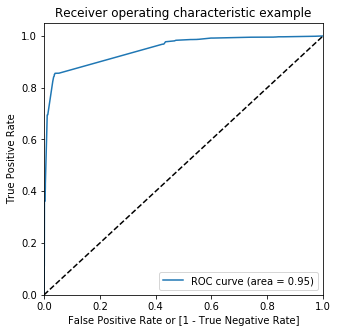

In [97]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Step 10: Finding Optimal Cutoff Point

In [98]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  Prospect_ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0      0    0.190648         3009          0    1    1    0    0    0    0   
1      0    0.061820         1012          0    1    0    0    0    0    0   
2      0    0.000672         9226          0    1    0    0    0    0    0   
3      1    0.787297         4750          1    1    1    1    1    1    1   
4      1    0.977035         7987          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    1    1    0    0  
4    1    1    1    1

In [99]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.706345  0.980785  0.534443
0.2   0.2  0.911825  0.856092  0.946735
0.3   0.3  0.920170  0.855683  0.960563
0.4   0.4  0.920170  0.855683  0.960563
0.5   0.5  0.919698  0.854047  0.960819
0.6   0.6  0.920013  0.851186  0.963124
0.7   0.7  0.920013  0.851186  0.963124
0.8   0.8  0.874665  0.695830  0.986684
0.9   0.9  0.777200  0.428863  0.995391


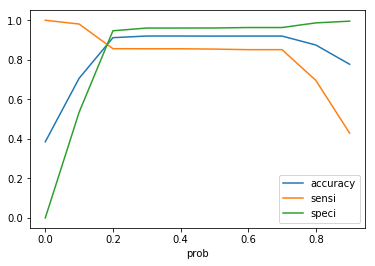

In [100]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

In [101]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

Churn  Churn_Prob  Prospect_ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0      0    0.190648         3009          0    1    1    0    0    0    0   
1      0    0.061820         1012          0    1    0    0    0    0    0   
2      0    0.000672         9226          0    1    0    0    0    0    0   
3      1    0.787297         4750          1    1    1    1    1    1    1   
4      1    0.977035         7987          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    0    0    0    0                0  
2    0    0    0    0                0  
3    1    1    0    0                1  
4    1    1    1    1                1

In [102]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.9118249094630767

In [103]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[3697,  208],
       [ 352, 2094]], dtype=int64)

In [104]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [105]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8560915780866721

In [106]:
# Let us calculate specificity
TN / float(TN+FP)

0.9467349551856594

In [107]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.053265044814340586


In [108]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9096437880104257


In [109]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9130649543097061


## Precision and Recall

In [110]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3752,  153],
       [ 357, 2089]], dtype=int64)

In [111]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.931757359500446

In [112]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8540474243663123

In [113]:
from sklearn.metrics import precision_score, recall_score

In [114]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.931757359500446

In [115]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8540474243663123

In [116]:
#Precision and recall tradeoff
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
        ..
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    0
 6332    0
 6333    0
 6334    0
 6335    0
 6336    0
 6337    0
 6338    0
 6339    0
 6340    0
 6341    0
 6342    1
 6343    0
 6344    1
 6345    1
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Churn, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 2

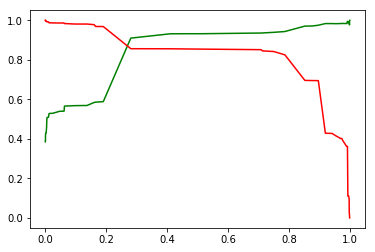

In [117]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [118]:
X_test[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']] = scaler.fit_transform(X_test[['TotalVisits',
                                                                                                      'Total_Time_Spent_on_Website','Page_Views_Per_Visit']])


C:\Users\Prathima\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Prathima\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [119]:
X_test = X_test[col1]
X_test.head()

Do_Not_Email  Busy  Closed by Horizzon  Lost to EINS  Ringing  \
3271             0     0                   0             0        0   
1490             0     0                   0             0        0   
7936             0     0                   0             0        0   
4216             0     0                   1             0        0   
3830             0     0                   0             0        0   

      Will revert after reading the email  switched off  SMS Sent  Not Sure  \
3271                                    1             0         0         1   
1490                                    1             0         0         0   
7936                                    1             0         0         1   
4216                                    0             0         0         0   
3830                                    1             0         0         1   

      Worst  Welingak Website  
3271      0                 0  
1490      0                 0  
7936      0                 0  
4216      0                 0  
3830      0                 0

In [120]:
X_test_sm = sm.add_constant(X_test)
#Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.190648
1490    0.897081
7936    0.190648
4216    0.998350
3830    0.190648
1800    0.897081
6507    0.010452
4821    0.000340
4223    0.992752
4714    0.190648
dtype: float64

In [121]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
3271  0.190648
1490  0.897081
7936  0.190648
4216  0.998350
3830  0.190648

In [122]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [123]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [124]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

Converted  CustID         0
0          0    3271  0.190648
1          1    1490  0.897081
2          0    7936  0.190648
3          1    4216  0.998350
4          0    3830  0.190648

In [125]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Converted_Prob'], axis=1)

In [126]:
# Let's see the head of y_pred_final
y_pred_final.head()

CustID  Converted  Converted_Prob
0    3271          0        0.190648
1    1490          1        0.897081
2    7936          0        0.190648
3    4216          1        0.998350
4    3830          0        0.190648

In [127]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.2 else 0)

In [128]:
y_pred_final.head()

CustID  Converted  Converted_Prob  final_predicted
0    3271          0        0.190648                0
1    1490          1        0.897081                1
2    7936          0        0.190648                0
3    4216          1        0.998350                1
4    3830          0        0.190648                0

In [129]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9074550128534704

In [130]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1640,   94],
       [ 158,  831]], dtype=int64)

In [131]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [132]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.840242669362993

In [133]:
# Let us calculate specificity
TN / float(TN+FP)

0.9457900807381776

### Assigning Lead score between 0 to 100

In [134]:
y_pred_lead_score = y_pred_final[['CustID','Converted','Converted_Prob','final_predicted']]

In [135]:
y_pred_lead_score['Lead_Score'] = round(y_pred_lead_score['Converted_Prob'] * 100,0).astype(int)

In [136]:
y_pred_lead_score.head()

CustID  Converted  Converted_Prob  final_predicted  Lead_Score
0    3271          0        0.190648                0          19
1    1490          1        0.897081                1          90
2    7936          0        0.190648                0          19
3    4216          1        0.998350                1         100
4    3830          0        0.190648                0          19

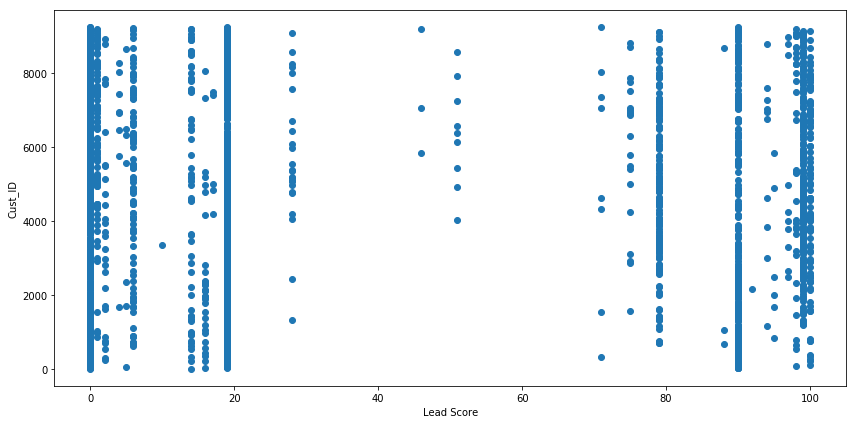

In [137]:
%matplotlib inline
fig = plt.figure(figsize = (12,6))
plt.scatter(y_pred_lead_score.Lead_Score, y_pred_lead_score.CustID)
plt.xlabel('Lead Score')
plt.ylabel('Cust_ID')
plt.tight_layout()
plt.show()